# Fashion MNIST Classification Assignment

## Build Model with Pytorch

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [57]:
IMAGE_SIZE = 16


composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [58]:
train_dataset = dsets.FashionMNIST(root='./data_faision', train=True, transform=composed, target_transform=None, download=True)
validation_dataset = dsets.FashionMNIST(root='./data_faision', train=False, transform=composed, target_transform=None, download=True)

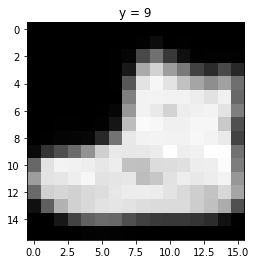

In [59]:
show_data(train_dataset[0])

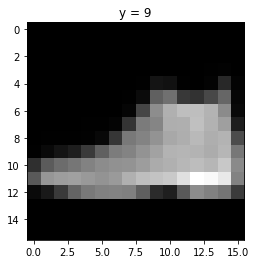

In [60]:
show_data(validation_dataset[0])

In [61]:
validation_dataset[0][1]

9

In [65]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [66]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(validation_dataset)
    accuracy_list=[]
    cost_list=[]
    cost=0
    for epoch in range(n_epochs):
        cost=0
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            cost += loss.data
        cost_list.append(cost)

        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
    return accuracy_list, cost_list

In [67]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [68]:
model_batch=CNN_batch(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)
accuracy_list_batch, loss_list_batch=train_model(model=model_batch,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

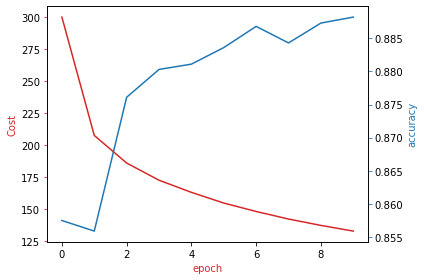

In [69]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list_batch, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_batch, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

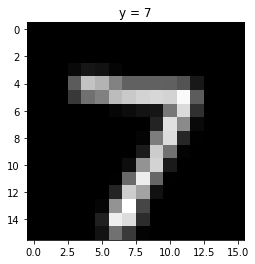

In [28]:
show_data(validation_dataset[0])

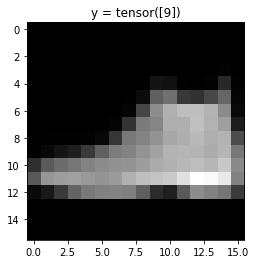

The picture shows number tensor([9])


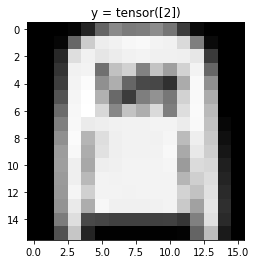

The picture shows number tensor([2])


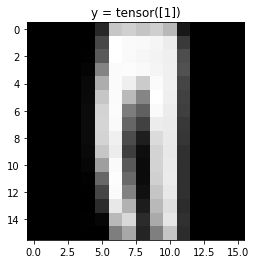

The picture shows number tensor([1])


In [70]:

count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model_batch(x)
    _, yhat = torch.max(z, 1)
    show_data((x, y))
    plt.show()
    count += 1
    print("The picture shows number {}".format(yhat))
    print("==============================================")
    if count >= 3:
        break  

## Build Model with Keras

In [104]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers
from keras.layers import BatchNormalization

In [73]:
# import data
from keras.datasets import fashion_mnist

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

4423680/4422102 [==============================] - 1s 0us/step


In [74]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # number of categories

In [108]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

### To access the keras Training history

**This is a Example:**
```
from keras.callbacks import Callback
class History(Callback):
    def on_train_begin(self,logs={}):
        self.losses=[]
        self.acces=[]
    def on_batch_end(self,batch,logs={}):
        self.losses.append(logs.get('loss'))
        self.acces.append(logs.get('acc'))
history = History()
print(history.losses)
```


More details about callback , please check [Write your own Callback Class](https://keras.io/guides/writing_your_own_callbacks/)

In [115]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200, verbose=2)

#with open('log_sgd_big_32.txt','w') as f:
#    f.write(str(model.history))

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/3
300/300 - 15s - loss: 0.4633 - accuracy: 0.8352 - val_loss: 1.2326 - val_accuracy: 0.5130
Epoch 2/3
300/300 - 15s - loss: 0.2975 - accuracy: 0.8911 - val_loss: 0.3736 - val_accuracy: 0.8595
Epoch 3/3
300/300 - 15s - loss: 0.2566 - accuracy: 0.9068 - val_loss: 0.3028 - val_accuracy: 0.8883
Accuracy: 0.8883000016212463 
 Error: 11.169999837875366


In [92]:
model.predict_classes(X_test[1:2]).astype('int')

array([2])

In [93]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)